# ANALYSIS - 2

# Where to Invest a Property in BOSTON to get maximum returns from Airbnb?

It has been analyzed earlier that the maximum number of listings are for Entire Home/Apartment. Lets check average prices for these listings based on room type

In [1]:
# cleaning the data

import pandas as pd
import numpy as np

inputDF = pd.read_csv('../data/listings.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]

In [2]:
# Average prices for each type of listing

avgPrice_DF=inputDF.groupby('room_type').price.mean()
avgPrice_DF=avgPrice_DF.reset_index()
avgPrice_DF=avgPrice_DF.rename(columns={'price':'average_Price'})
avgPrice_DF

,room_type,average_Price
0,Entire home/apt,232.322326
1,Private room,89.505184
2,Shared room,69.903846


It can be concluded that Entire home/Apartment room type has the maximum average price which gives us a data point that after buying an Apartment, listing an entire Apartment on Airbnb will help to generate maximum revenue. 

In [3]:
# Geographical Clusters to find out which area in Boston has maximum listings on Airbnb

# seggregating each type of property

home = inputDF[(inputDF.room_type == 'Entire home/apt')]
private = inputDF[(inputDF.room_type == 'Private room')]
shared = inputDF[(inputDF.room_type == 'Shared room')]

location_home = home[['latitude', 'longitude']]
location_private = private[['latitude', 'longitude']]
location_shared = shared[['latitude', 'longitude']]

In [7]:
from bokeh.io import push_notebook, show, output_notebook
import os

from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)
output_notebook()
map_options = GMapOptions(lat=42.3318, lng=-71.1212, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options,width=1200, height=750
)
plot.title.text = "Boston"

plot.api_key = os.environ['data_download_key']

source = ColumnDataSource(
    data=dict(
        lat_home=location_home['latitude'],
        lon_home=location_home['longitude'],
        lat_private=location_private['latitude'],
        lon_private=location_private['longitude'],
        lat_shared=location_shared['latitude'],
        lon_shared=location_shared['longitude']
    )
)


circle_home = Circle(x="lon_home", y="lat_home", size=4, fill_color="blue", fill_alpha=0.9, line_color=None)
circle_private =  Circle(x="lon_private", y="lat_private", size=4, fill_color="red", fill_alpha=0.9, line_color=None)
circle_shared =  Circle(x="lon_shared", y="lat_shared", size=4, fill_color="#006600", fill_alpha=0.9, line_color=None)

plot.add_glyph(source, circle_home)
plot.add_glyph(source, circle_private)
plot.add_glyph(source, circle_shared)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
show(plot)

Loading BokehJS ...

C:\Users\Ruchi\AppData\Local\Continuum\Anaconda3\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


Blue circles indicates Entire Apartment/home listings
red circle indicates private room listings
green indicates shared listings

It can be seen that Wealthier neighborhoods, mainly South End, north end, Fenway park and back bay have a higher proportion of listings for an entire apartment while Less central and poorer neighborhoods have a disproportionate number of listings from multi-unit listers.For example, Allston, there are only  listings with private room.
Hence, this analysis gives us another data point that Wealthier neighborhoods should be chosen for property investment.
Analyzing data on Entire Apartments/home to find the right location to invest property.

In [5]:
# grouping neighbourhood by number of listings

neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
21,South End,165
1,Back Bay,157
12,Jamaica Plain,125
10,Fenway,113
3,Beacon Hill,101


In [6]:
# grouping neighbourhood by average price of listings

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Average_Price
20,South Boston Waterfront,300.261905
2,Bay Village,300.083333
13,Leather District,284.500000
1,Back Bay,280.006369
6,Chinatown,275.193548


In [7]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()


,neighbourhood_cleansed,Number_Of_Listings,Average_Price
0,South End,165,245.290909
1,Back Bay,157,280.006369
2,Jamaica Plain,125,211.160000
3,Fenway,113,240.398230
4,Beacon Hill,101,255.178218


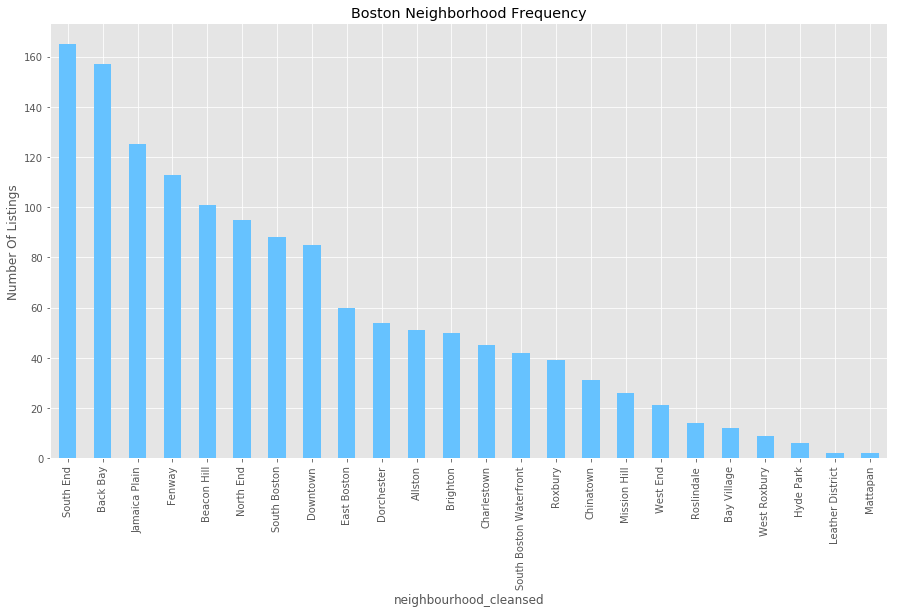

In [8]:
# visualizing the frequency of listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number Of Listings')

It can be noticed that the maximum number of listings for entire apartment for Boston on Airbnb is in South End area followed by back bay and Jamaica plain.So these area become potential neighbourhood to invest a property 

In [9]:
# Exploring the relationship between price and neighbourhood

from bokeh.charts import BoxPlot, output_file, show
from bokeh.io import push_notebook, show, output_notebook

output_notebook()
p = BoxPlot(home, values='price', label='neighbourhood_cleansed',width=900,
            title="Relationship between Price and neighbourhood")

show(p)

Loading BokehJS ...

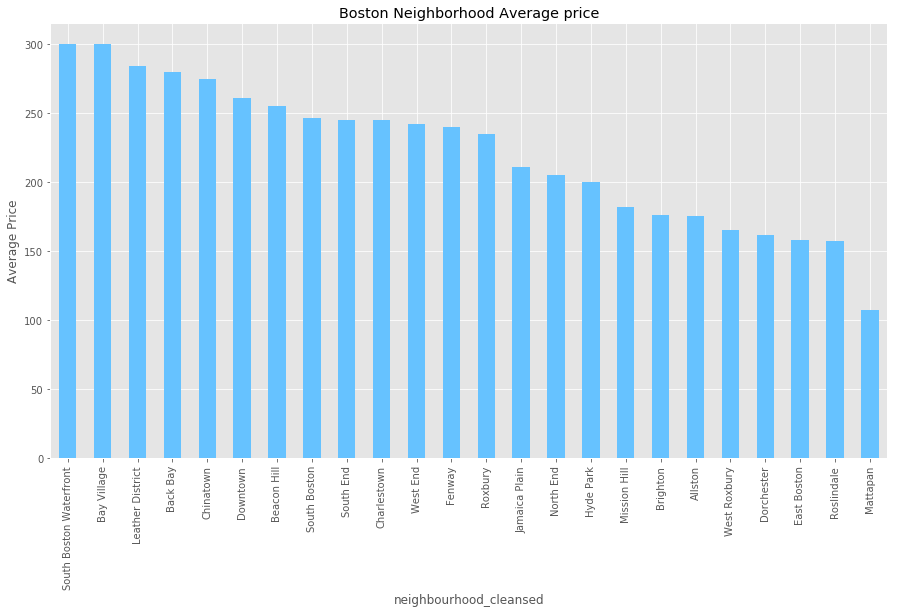

In [10]:
# Now lets visualize average price of these listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Average_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Neighborhood Average price', 
           legend = False)

plt.ylabel('Average Price')

By analyzing the number of listings and prices per neighborhood, we can get a clearer understanding of how accurate the average price is per neighborhood. The neighorhoods with a lot of listings (such as South End & Back Bay), we can expect a more accurate average prices. However, neighborhoods with less than 100 listings might have relatively inaccurate average prices due to presence of outliers.
Looking at the analysis done so far, one might conclude that certain neighborhoods are more 'expensive' than others.

'Back Bay' and 'South Boston' can be considered as the potential locations as the number of listings are maximum,wealthier neighbourhoods and the avergae price of houses is fairly high.

In [11]:
# Let's look at the differences between the words used in listings for Airbnb locations in different Boston neighborhoods

import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

uniqueNeighborhoods = inputDF.neighbourhood_cleansed.unique().tolist()

#function to clean the data and compile a list of most common words
def cleanData(neighbrhood_name,descrip):
    p = re.sub('[^a-zA-Z]+',' ', descrip)
    cmn_words=['The','I','Boston','room']
    descrip_data=nltk.word_tokenize(p)
    filtered_data=[word.lower() for word in descrip_data if word not in cmn_words if word not in stopwords.words('english')] 
    wnl = nltk.WordNetLemmatizer() 
    counts=Counter([wnl.lemmatize(data) for data in filtered_data])
    commn_words=[]
    for w in counts.most_common(5):
        commn_words.append(w[0])
    return ' '.join(commn_words)

summ={}
for n in uniqueNeighborhoods:
    text=''
    for index,row in inputDF.iterrows():
        if row['neighbourhood_cleansed']==n:
            if ((row['description']!=0) & (row['space']!=0) & (row['neighborhood_overview']!=0)):
                text =text+row['description']+row['space']+row['neighborhood_overview']
    summ[n]=text

final_DF_neighbrhood=pd.DataFrame(columns=['neighborhood','top 5 words in description'])
for a in summ.items():
    top5words=cleanData(a[0],a[1])
    final_DF_neighbrhood=final_DF_neighbrhood.append(pd.Series([a[0],top5words],index=['neighborhood','top 5 words in description']),ignore_index=True)

final_DF_neighbrhood.to_csv('top_words_description.csv')

In [12]:
final_DF_neighbrhood.head()

,neighborhood,top 5 words in description
0,Roslindale,roslindale minute guest house neighborhood
1,Jamaica Plain,jamaica walk minute neighborhood bedroom
2,Mission Hill,apartment bed bedroom walk medical
3,Longwood Medical Area,longwood bathroom access kitchen medical
4,Bay Village,walk bay bed arlington bedroom


I can be observed that for neighborhood "South Boston Waterfront" major words include seaport, "Hyde Park" includes quiet, "East Boston" includes airport, downtown, station and chinatown includes theatre.All these observations shows that these words are unique to a particular neighborhood which gives us another data point that while listing the property on airbnb these words should definitely be included to attract travellers.

After combining all the data points collected from above analysis it can be concluded that:

1. Invest a property in a wealthy neighborhood and according to this analysis that neighborhood should be 'Back Bay' and 'South End' as they have maximum number of listings and average prices in these neighborhood is fairly high.
2. After buying an Apartment, listing an entire Apartment on Airbnb will help to generate maximum revenue.
3. While listing the property on AirBnB, keywords describing the area should be added in order to gain the attention of travellers